In [8]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
%matplotlib inline
url = 'timeseries/data/a10.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [41]:
series = df.iloc[1:5]
print(series)
series = df.iloc[1:5,0]
print(series)
series = df.loc[:,'value']
print(series)

               value
date                
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869
date
1991-08-01    3.180891
1991-09-01    3.252221
1991-10-01    3.611003
1991-11-01    3.565869
Name: value, dtype: float64
date
1991-07-01     3.526591
1991-08-01     3.180891
1991-09-01     3.252221
1991-10-01     3.611003
1991-11-01     3.565869
                ...    
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Name: value, Length: 204, dtype: float64


In [43]:
series = df.loc[:,'value'].values
print(series)

[ 3.526591    3.180891    3.252221    3.611003    3.565869    4.306371
  5.088335    2.81452     2.985811    3.20478     3.127578    3.270523
  3.73785082  3.55877609  3.77720173  3.92449042  4.38653092  5.81054917
  6.19206769  3.45085699  3.77230686  3.7343029   3.90539892  4.04968714
  4.31556552  4.56218455  4.60866203  4.66785129  5.09384145  7.1799622
  6.73147308  3.84127758  4.39407557  4.07534073  4.5406449   4.64561508
  4.75260653  5.35060467  5.20445484  5.3016513   5.77374216  6.20459348
  6.74948382  4.21606735  4.94934946  4.8230449   5.19475419  5.17078711
  5.25674157  5.85527729  5.49072901  6.11529323  6.08847284  7.41659792
  8.32945212  5.06979585  5.26255667  5.59712628  6.110296    5.68916084
  6.48684933  6.30056933  6.46747574  6.82862939  6.64907826  8.60693721
  8.52447101  5.27791837  5.71430345  6.21452908  6.41192919  6.66771564
  7.05083102  6.70491861  7.25098761  7.81973318  7.39810106 10.09623339
  8.79851303  5.91826076  6.53449298  6.67573561  7.0642

<AxesSubplot:title={'center':'a10 - Drug Sales Series'}, xlabel='date'>

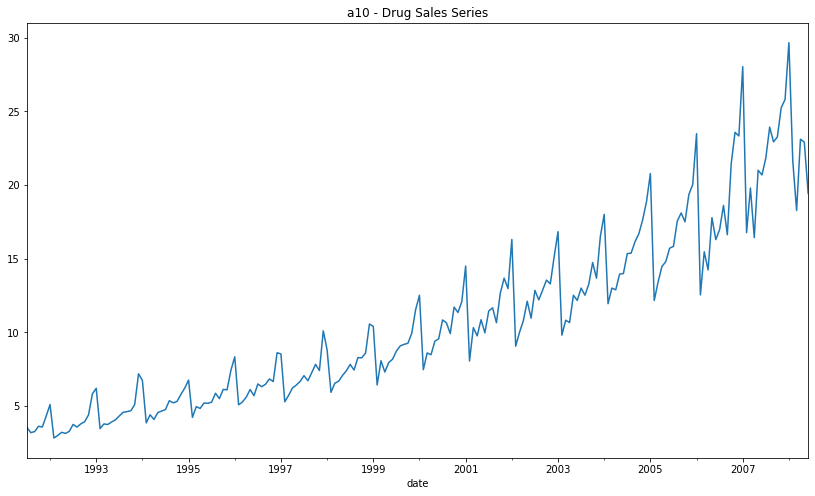

In [44]:
df.plot(figsize=(14,8), legend=None, title='a10 - Drug Sales Series')

In [46]:
result = adfuller(series, autolag='AIC')
print(result)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
# p值为1表示没有理由拒绝原假设，也就是存在单位根，时间序列非平稳
print(f'p-value: {result[1]}')

(3.14518568930673, 1.0, 15, 188, {'1%': -3.465620397124192, '5%': -2.8770397560752436, '10%': -2.5750324547306476}, 549.6705685364174)
ADF Statistic: 3.14518568930673
n_lags: 1.0
p-value: 1.0


[ 1.44730291  1.68890852 -0.44148592  1.33739943 -0.02980537 -0.21455013
 -0.32494503  0.69833894  1.47165363  0.97734574  0.57834938 -0.37727304
 -1.52836175 -0.95403325 -0.44781985 -0.52993823 -0.79154083 -1.25623276
 -1.47209194 -0.23375775 -0.91971186 -1.67507316 -0.01221185  1.52200498
  2.11150479  0.75450082  0.74898978  1.03007741 -0.37889364 -2.04109384
  1.49261507  2.56212099  0.90303435 -0.55499691  0.01073651 -0.64022905
  1.46330192 -1.65893022 -0.61493366 -0.62938319 -0.98275042 -0.59594722
 -0.85242481  0.88396888  0.19115695 -0.04666719 -1.4470105  -0.80196898
  1.39238043 -0.87304198  1.19637023  0.25032089 -0.93636275  1.68695694
  0.74866655 -0.60999656  1.27624176 -1.3961598   0.0197265  -0.44050865
  0.48711591 -0.51141086  1.25209367 -1.90335463  0.66478572 -1.13180239
 -0.76053718 -0.09023557  0.26369331  0.53542958  0.21735833 -0.44492451
 -2.3783153  -1.29423656  0.41756697  0.8817823   0.73674067  1.442241
  0.29565586 -0.09557519  0.95703025 -1.80271692  0.1

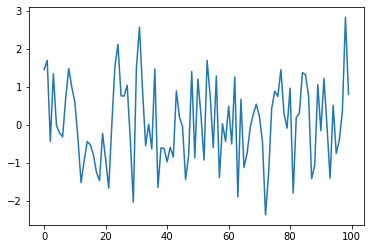

In [53]:
import matplotlib.pyplot as plt
# 生产一组随机数检验平稳性
series = np.random.randn(100)
print(series)
plt.plot(series)

In [54]:
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
# p值远远小于0.05，表示拒绝原假设，即时间序列是平稳的
print(f'p-value: {result[1]}')

ADF Statistic: -8.431973905104304
p-value: 1.8596195832010985e-13
